# Airbnb Price Prediction
## NYC Airbnb Open Data 2020
 http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/visualisations/listings.csv
 
## Team Members:
    - Azam Zubairi (27424), Umair Afzal (28004)

### Project Index
1. [Import Libaray and Data](#import)
2. [Exploratory Data Analysis](#eda)
3. [Preprocessing data](#proc)
4. [Encoding categorical variables](#encode)
5. [Train Test Split](#ttsplit)
6. [Linear Regression](#lreg)
7. [Random Forest Regression](#rfreg)
8. [Decision Tree Regression](#dtreg)
9. [Model Comparison](#compare)
10. [Conclusion](#conclude)

<a id='import'></a>
# Import Libaray and Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import folium

from folium import plugins
import branca.colormap as cm

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

In [42]:
df=pd.read_csv('listing_summary.csv')
df.head()

C:\Users\Dell\anaconda3\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning:

Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.



id                                      name  host_id  host_name  \
0  2595                     Skylit Midtown Castle     2845   Jennifer   
1  5121                           BlissArtsSpace!     7356      Garon   
2  5136  Spacious Brooklyn Duplex, Patio + Garden     7378    Rebecca   
3  5178          Large Furnished Room Near B'way　     8967   Shunichi   
4  5203        Cozy Clean Guest Room - Family Apt     7490  MaryEllen   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2            Brooklyn         Sunset Park  40.66265  -73.99454   
3           Manhattan             Midtown  40.76457  -73.98317   
4           Manhattan     Upper West Side  40.80380  -73.96751   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 48  2019-11-04   
1     Private room     60              30                 50  2019-12-02   
2  Entire home/apt    275               5                  2  2021-08-08   
3     Private room     68               2                520  2022-02-18   
4     Private room     75               2                118  2017-07-21   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.32                               3               334   
1               0.32                               2               365   
2               0.02                               1               201   
3               3.33                               1               154   
4               0.77                               1                 0   

   number_of_reviews_ltm license  
0                      0     NaN  
1                      0     NaN  
2                      1     NaN  
3                     46     NaN  
4                      0     NaN

In [43]:
df.shape

(37631, 18)

<a id='eda'></a>
# Exploratory Data Analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37631 entries, 0 to 37630
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37631 non-null  int64  
 1   name                            37617 non-null  object 
 2   host_id                         37631 non-null  int64  
 3   host_name                       37544 non-null  object 
 4   neighbourhood_group             37631 non-null  object 
 5   neighbourhood                   37631 non-null  object 
 6   latitude                        37631 non-null  float64
 7   longitude                       37631 non-null  float64
 8   room_type                       37631 non-null  object 
 9   price                           37631 non-null  int64  
 10  minimum_nights                  37631 non-null  int64  
 11  number_of_reviews               37631 non-null  int64  
 12  last_review                     

In [45]:
#count missing values and percentage 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
percent = percent * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data

Total    Percent
license                         37630  99.997343
last_review                      8974  23.847360
reviews_per_month                8974  23.847360
host_name                          87   0.231192
name                               14   0.037203
room_type                           0   0.000000
host_id                             0   0.000000
neighbourhood_group                 0   0.000000
neighbourhood                       0   0.000000
latitude                            0   0.000000
longitude                           0   0.000000
number_of_reviews                   0   0.000000
id                                  0   0.000000
calculated_host_listings_count      0   0.000000
availability_365                    0   0.000000
number_of_reviews_ltm               0   0.000000
minimum_nights                      0   0.000000
price                               0   0.000000

We can see that the license column is almost empty so we will be dropping that column. Additionally there are null values in name, host_name, last_review and reviews_per_month columns. Since the number of null values for last_review and reviews per month are same, so we can assume that those 8974 listings have not gotten any reviews, we will replace missing values with 0 for reviews_per_month columns.

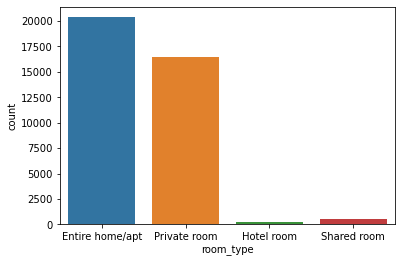

In [46]:
#Bar chart for room type
ax = sns.countplot(x="room_type", data=df)

We can see that there are 4 room type, and most listings are Entire home or Private room.

In [47]:
#Calculating mean price for each room type
rt_price = df.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    216.920342
Hotel room         274.813131
Private room       103.087636
Shared room        145.201401
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

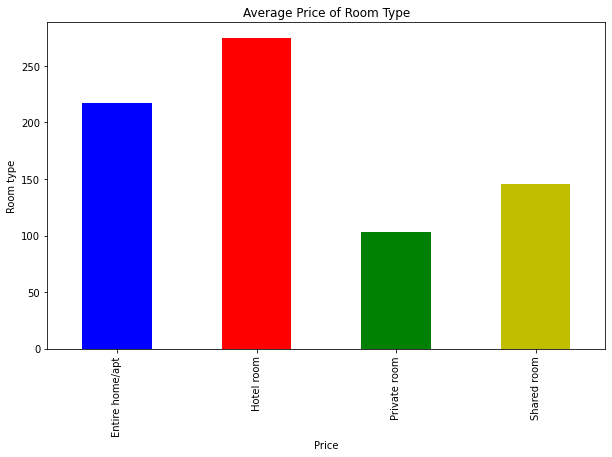

In [48]:
#plotting room type against price to compare prices of each room type
plt.figure(figsize = (10,6))
c = ['b', 'r', 'g', 'y']
df.groupby('room_type')['price'].mean().plot(kind='bar', stacked=True, color=c)
plt.xlabel('Price')
plt.ylabel('Room type')
plt.title("Average Price of Room Type")
plt.show

We can see that Hotel room and Entire home are more expensive than Private room and Shared room, which was expected.

<AxesSubplot:title={'center':'Price Distribution'}, xlabel='price', ylabel='Density'>

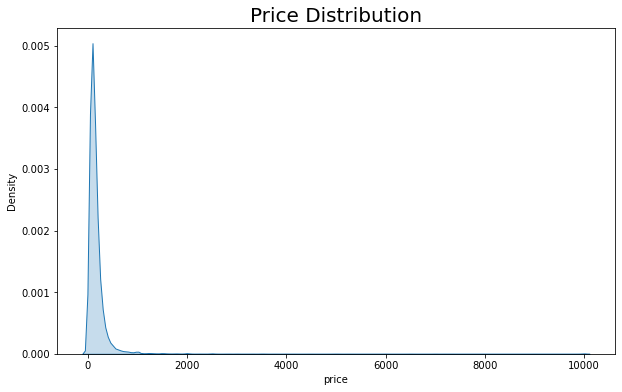

In [49]:
#explore price distribution
plt.figure(figsize = (10,6))
plt.title('Price Distribution',fontsize=20)
sns.kdeplot(df['price'], shade='True', legend='True')


We can see that prices range from 0 to 10000. And from the plot we can observe that most of listings have price less than 500. And the graph shows a skewed distribution. To make analysis and to get better scores, we will apply log transformation for the price column.

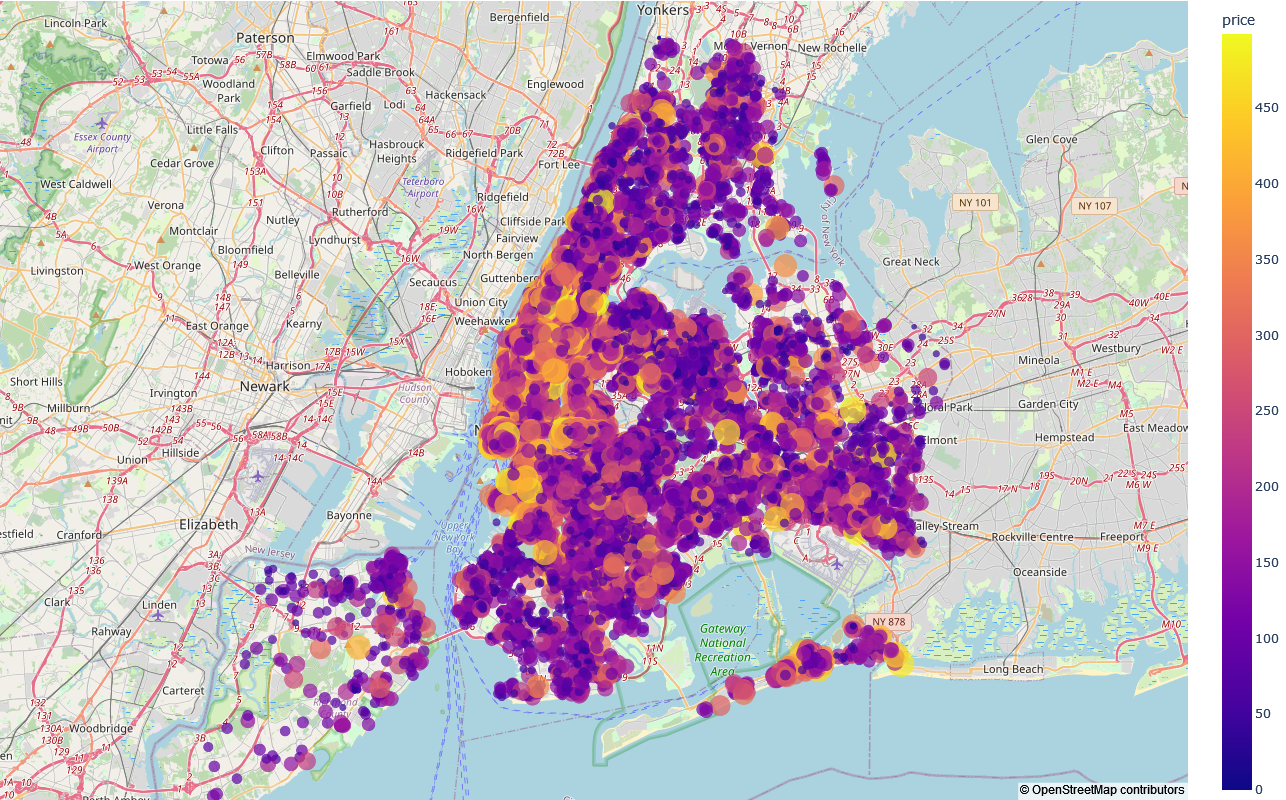

In [50]:
price500 = df['price'] < 500
df500 = df[price500]
fig=px.scatter_mapbox(data_frame=df500,
                      lat="latitude",
                      lon="longitude",
                      color="price",
                    hover_data=["price"],
                     hover_name="neighbourhood",
                     height=800,
                      width=1000,
                     size="price",
                     zoom=10
                     );

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
fig.show()

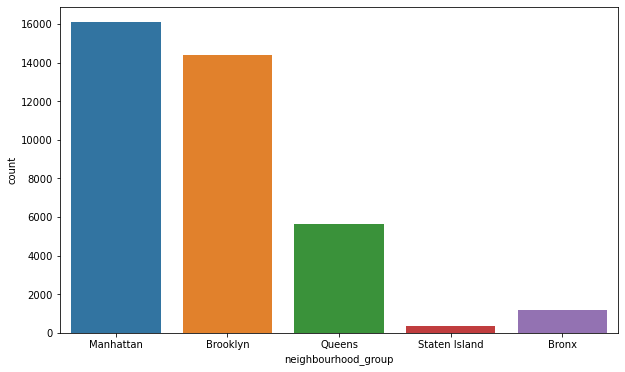

In [51]:
#Exploring the neighbourhood_group variable
plt.figure(figsize = (10,6))
ax = sns.countplot(x="neighbourhood_group", data=df)

We can see that there are more listings in Brooklyn and Manhattan. These are the areas which attract the most visitors

Text(0.5, 1.0, 'Average Price of Neighbourhood Groups')

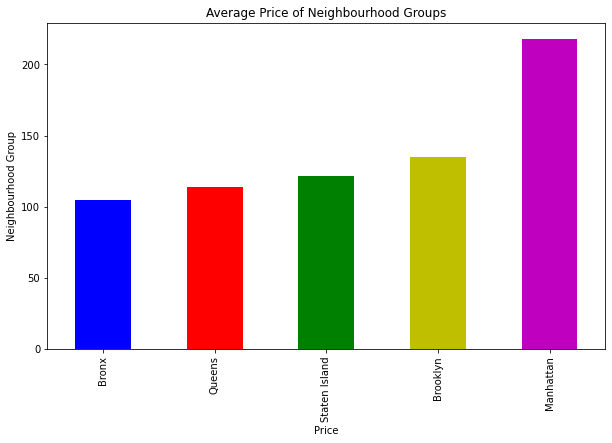

In [52]:
#Plotting the average price of the Neighbourhood Groups
plt.figure(figsize = (10,6))
c = ['b', 'r', 'g', 'y', 'm']
ng_p_mean_df = df.groupby("neighbourhood_group")["price"].mean().sort_values().plot(kind='bar', stacked=True, color=c)
plt.xlabel("Price")
plt.ylabel("Neighbourhood Group")
plt.title("Average Price of Neighbourhood Groups")

We can see that the average price in Manhattan is much higher than other neighbourhood groups.

C:\Users\Dell\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Minimum Nights'}, xlabel='minimum_nights'>

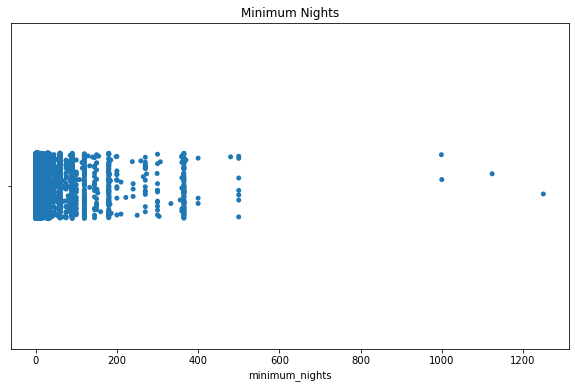

In [53]:
#Explore minimum nights variable
plt.figure(figsize = (10,6))
plt.title('Minimum Nights')
sns.stripplot(df['minimum_nights'])

<AxesSubplot:>

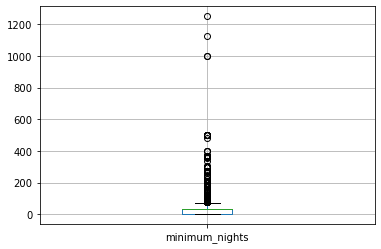

In [54]:
df.boxplot(column="minimum_nights")

We can see that minimum nights are between 0 night to 4 years. And most listings provide service ranging from 1 night to 1 year.

<a id='proc'></a>
# Preprocessing data

Some columns are of no use for us and will not affect the model. So we will drop those columns.

In [55]:
df.drop(['name','id','host_name', 'host_id', 'last_review', 'license'], axis=1, inplace=True)

In [56]:
df.head()

neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2            Brooklyn         Sunset Park  40.66265  -73.99454   
3           Manhattan             Midtown  40.76457  -73.98317   
4           Manhattan     Upper West Side  40.80380  -73.96751   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt    150              30                 48   
1     Private room     60              30                 50   
2  Entire home/apt    275               5                  2   
3     Private room     68               2                520   
4     Private room     75               2                118   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.32                               3               334   
1               0.32                               2               365   
2               0.02                               1               201   
3               3.33                               1               154   
4               0.77                               1                 0   

   number_of_reviews_ltm  
0                      0  
1                      0  
2                      1  
3                     46  
4                      0

In [57]:
df.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8974
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

We can see that we still have null values in reviews_per_month column, so we will impute missing values with 0 of reviews_per_month column.

In [58]:
df['reviews_per_month'].fillna(0, inplace=True)

In [59]:
#Exploring and removing outliers
df[df["price"]>500]

neighbourhood_group      neighbourhood   latitude  longitude  \
53              Manhattan       West Village  40.729610 -74.003080   
78               Brooklyn        Boerum Hill  40.684420 -73.980680   
84              Manhattan    Lower East Side  40.719920 -73.991670   
162             Manhattan             Nolita  40.720000 -73.994870   
206              Brooklyn         Greenpoint  40.737780 -73.953660   
...                   ...                ...        ...        ...   
37446            Brooklyn        Brownsville  40.669908 -73.905400   
37578            Brooklyn      Crown Heights  40.669804 -73.932541   
37583            Brooklyn       Williamsburg  40.720604 -73.961963   
37611           Manhattan  Greenwich Village  40.734648 -73.997708   
37613            Brooklyn      Crown Heights  40.671674 -73.932561   

             room_type  price  minimum_nights  number_of_reviews  \
53     Entire home/apt    575               7                 52   
78     Entire home/apt    675               3                 30   
84     Entire home/apt    550               5                 65   
162    Entire home/apt    596               2                226   
206       Private room    599               3                  9   
...                ...    ...             ...                ...   
37446  Entire home/apt    680               1                  0   
37578  Entire home/apt    574               1                  0   
37583  Entire home/apt    661               1                  0   
37611  Entire home/apt    600               1                  0   
37613  Entire home/apt    524               1                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
53                  0.45                               2               268   
78                  0.26                               1               271   
84                  0.46                               1               253   
162                 1.69                               1               142   
206                 0.07                              30                34   
...                  ...                             ...               ...   
37446               0.00                               1               365   
37578               0.00                               3               364   
37583               0.00                               1                19   
37611               0.00                               1               360   
37613               0.00                               3               365   

       number_of_reviews_ltm  
53                         2  
78                         7  
84                         7  
162                       10  
206                        0  
...                      ...  
37446                      0  
37578                      0  
37583                      0  
37611                      0  
37613                      0  

[1214 rows x 12 columns]

1214 listings have price per day > 500. These are either very lavish luxury listings or there is an errorin the data. Nonetheless, since these records are impacting our data, we will treat them as outliers and drop them.

In [60]:
df=df[df["price"]<500]

In [61]:
df.iloc[:,3:].describe()

longitude         price  minimum_nights  number_of_reviews  \
count  36293.000000  36293.000000    36293.000000       36293.000000   
mean     -73.946010    132.589122       20.613066          25.110187   
std        0.053095     88.816767       29.238229          53.508259   
min      -74.249840      0.000000        1.000000           0.000000   
25%      -73.982370     66.000000        2.000000           1.000000   
50%      -73.953190    109.000000       30.000000           4.000000   
75%      -73.926870    171.000000       30.000000          22.000000   
max      -73.705220    499.000000     1250.000000        1024.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       36293.000000                    36293.000000      36293.000000   
mean            0.811552                       15.087923        127.893092   
std             1.649499                       45.341008        140.171963   
min             0.000000                        1.000000          0.000000   
25%             0.010000                        1.000000          0.000000   
50%             0.210000                        1.000000         64.000000   
75%             1.000000                        4.000000        273.000000   
max            90.000000                      332.000000        365.000000   

       number_of_reviews_ltm  
count           36293.000000  
mean                6.127187  
std                17.033166  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 4.000000  
max               849.000000

In [62]:
#For a more normal distribution we apply log transformation to the price
df['price'] = np.log(df.price+1)

C:\Users\Dell\anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Log-Price Distribution Plot')

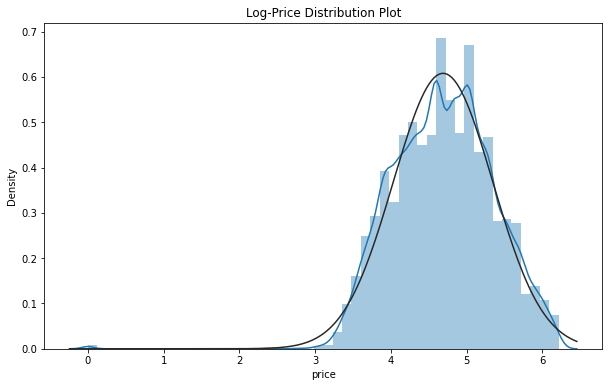

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'], fit=norm)
plt.title("Log-Price Distribution Plot")

[(11.0, 0.0)]

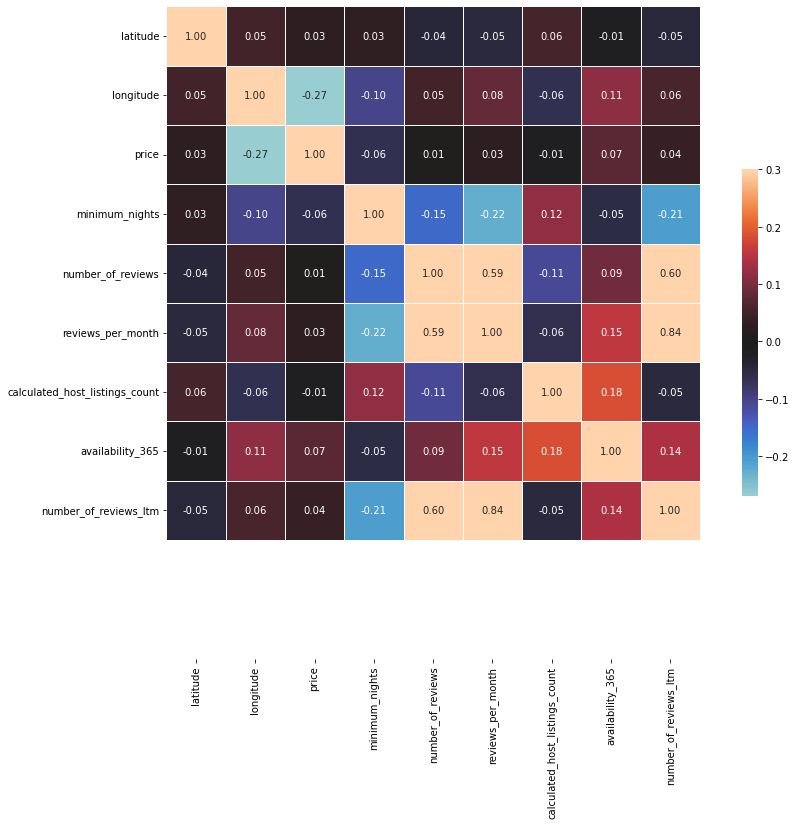

In [64]:
#Corelation Matrix
plt.figure(figsize=(15,12))
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))

<a id='encode'></a>
# Encoding categorical variables

In [136]:
feature_columns=['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']
features=df[feature_columns]
features.head()

neighbourhood_group        room_type     price  minimum_nights  \
0           Manhattan  Entire home/apt  5.017280              30   
1            Brooklyn     Private room  4.110874              30   
2            Brooklyn  Entire home/apt  5.620401               5   
3           Manhattan     Private room  4.234107               2   
4           Manhattan     Private room  4.330733               2   

   calculated_host_listings_count  availability_365  
0                               3               334  
1                               2               365  
2                               1               201  
3                               1               154  
4                               1                 0

In [137]:
features['room_type']=features['room_type'].factorize()[0]
features['neighbourhood_group']=features['neighbourhood_group'].factorize()[0]
features.head()

C:\Users\Dell\AppData\Local\Temp/ipykernel_18552/3118400273.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp/ipykernel_18552/3118400273.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



neighbourhood_group  room_type     price  minimum_nights  \
0                    0          0  5.017280              30   
1                    1          1  4.110874              30   
2                    1          0  5.620401               5   
3                    0          1  4.234107               2   
4                    0          1  4.330733               2   

   calculated_host_listings_count  availability_365  
0                               3               334  
1                               2               365  
2                               1               201  
3                               1               154  
4                               1                 0

<a id='ttsplit'></a>
# Train Test Split

In [138]:
y = features['price']
x= features.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# collect scores of each algorithm for model comparison
mae_dict = {}
mse_dict = {}
x

neighbourhood_group  room_type  minimum_nights  \
0                        0          0              30   
1                        1          1              30   
2                        1          0               5   
3                        0          1               2   
4                        0          1               2   
...                    ...        ...             ...   
37626                    2          1              30   
37627                    0          1              60   
37628                    0          1              30   
37629                    0          1               1   
37630                    0          0              31   

       calculated_host_listings_count  availability_365  
0                                   3               334  
1                                   2               365  
2                                   1               201  
3                                   1               154  
4                                   1                 0  
...                               ...               ...  
37626                             126                57  
37627                               7               365  
37628                               7               334  
37629                               1               357  
37630                              84               358  

[36293 rows x 5 columns]

<a id='lreg'></a>
# Linear Regression

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


print('MAE:{:.3f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE:{:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

MAE:0.387
MSE:0.241
RMSE:0.491


In [140]:
mae_dict['Liner Regression'] = mean_absolute_error(y_test, y_pred)
mse_dict['Liner Regression'] = mean_squared_error(y_test, y_pred)

In [142]:
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
# expm1 is used to revert the data normalized by log1p
error['actual']=np.expm1(error['actual'])
error['prediction']=np.array(np.expm1(y_pred))
error.head(20)

actual  prediction
0    121.0  117.174514
1     34.0   61.737552
2    180.0  157.193292
3    150.0  157.193292
4    145.0  157.193292
5    176.0  141.668959
6    200.0   85.005960
7    120.0  157.193292
8    115.0  155.796233
9    125.0  164.062804
10    50.0   60.041536
11    90.0   71.456441
12   115.0  157.883588
13    34.0   43.827468
14   200.0  150.814750
15   150.0  139.645959
16   149.0  128.821607
17    67.0  138.241359
18   130.0  159.801290
19   165.0  136.924371

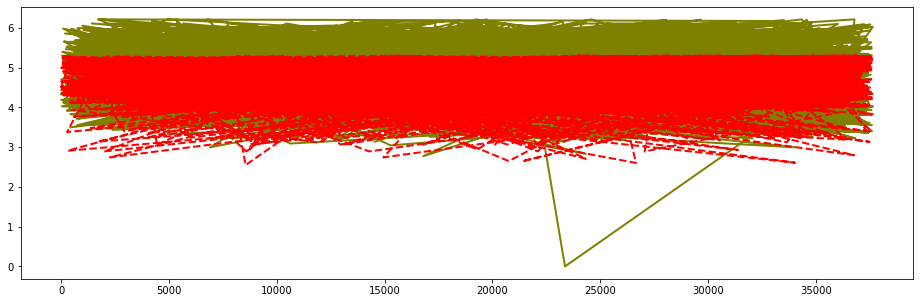

In [143]:
fig, axes = plt.subplots(figsize=(16,5))
_=axes.plot(y_test.index, y_test, marker='', color='olive', linewidth=2)
_=axes.plot(y_test.index, y_pred, marker='', color='r', linewidth=2, linestyle='dashed', label="predicted")

<a id='rfreg'></a>
# Random Forest Regression 

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [145]:
# params for grid search
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [150]:
rf_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_model, 
                                param_distributions = rm_grid, 
                                n_iter = 10, 
                                cv = 3, 
                                verbose=2, 
                                random_state=66,
                                n_jobs = -1)

In [ ]:
# search for the best parameters
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rf_random.best_estimator_

In [149]:
rf_model_best = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'

In [ ]:
rf_model_best.fit(x_train, y_train)
y_pred = rf_model_best.predict(x_test)

In [ ]:
print('MAE:{:.3f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE:{:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
mae_dict['Random Forest'] = mean_absolute_error(y_test, y_pred)
mse_dict['Random Forest'] = mean_squared_error(y_test, y_pred)

In [ ]:
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
error['actual']=np.expm1(error['actual'])
error['prediction']=np.array(np.expm1(y_pred))
error.head(20)

<a id='dtreg'></a>
# Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dtree_model = DecisionTreeRegressor();

In [44]:
dtree_model.fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)

In [45]:
print('R-squared train score: {:.3f}'.format(dtree_model.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(dtree_model.score(x_test, y_test)))
print('MAE:{:.3f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE:{:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R-squared train score: 0.700
R-squared test score: 0.418
MAE:0.371
MSE:0.249
RMSE:0.499


In [46]:
r_squared_test_score_dict['Decision Tree'] = dtree_model.score(x_test, y_test)
mae_dict['Decision Tree'] = mean_absolute_error(y_test, y_pred)
mse_dict['Decision Tree'] = mean_squared_error(y_test, y_pred)

In [47]:
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
# expm1 is used to revert the data normalized by log1p
error['actual']=np.expm1(error['actual'])
error['prediction']=np.array(np.expm1(y_pred))
error.head(20)

actual  prediction
0     99.0   81.288142
1    105.0  124.979359
2    250.0   59.000000
3     64.0   65.483081
4     30.0   68.629307
5    120.0  140.541513
6     76.0   99.000000
7    200.0  125.919136
8    200.0  149.884704
9     57.0   36.000000
10    40.0   82.209964
11   115.0  142.083713
12    98.0   80.000000
13    70.0   74.000000
14    40.0   41.000000
15    71.0   37.591263
16   146.0  232.000000
17    46.0   54.000000
18    80.0   56.000000
19    50.0   62.264897

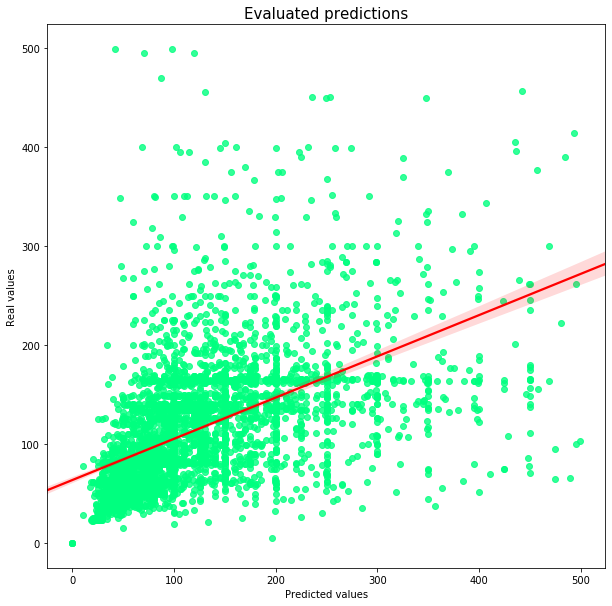

In [48]:
plt.figure(figsize=(10,10))
sns.regplot(y=np.array(np.expm1(y_pred)), x=np.array(np.expm1(y_test)), line_kws={"color": "red"}, color='springgreen')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

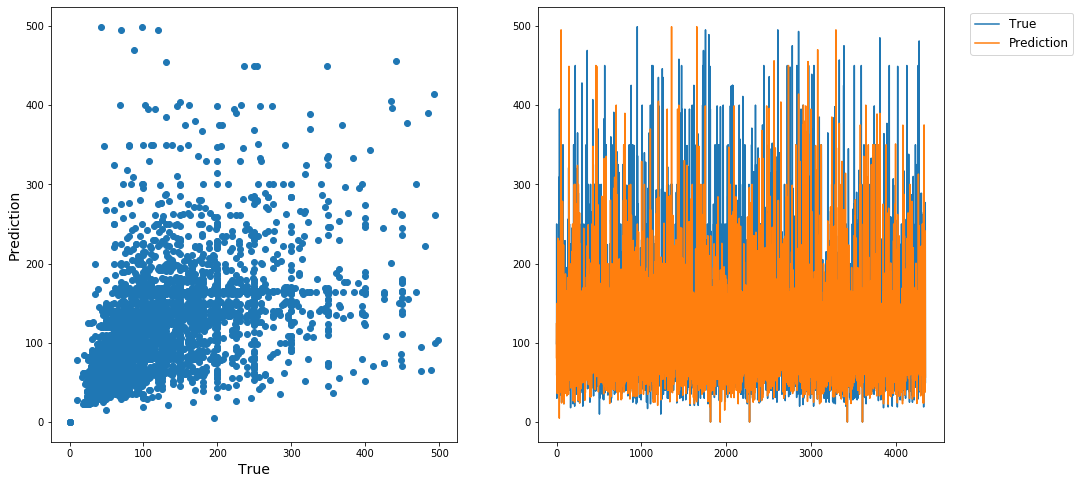

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.scatter(np.array(np.expm1(y_test)),np.expm1(y_pred))
ax1.set_xlabel("True", size = 14)
ax1.set_ylabel("Prediction", size = 14)
ax2.plot(np.array(np.expm1(y_test)), label="True")
ax2.plot(np.expm1(y_pred), label = "Prediction")
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})

<a id='compare'></a>
# Model Comparison

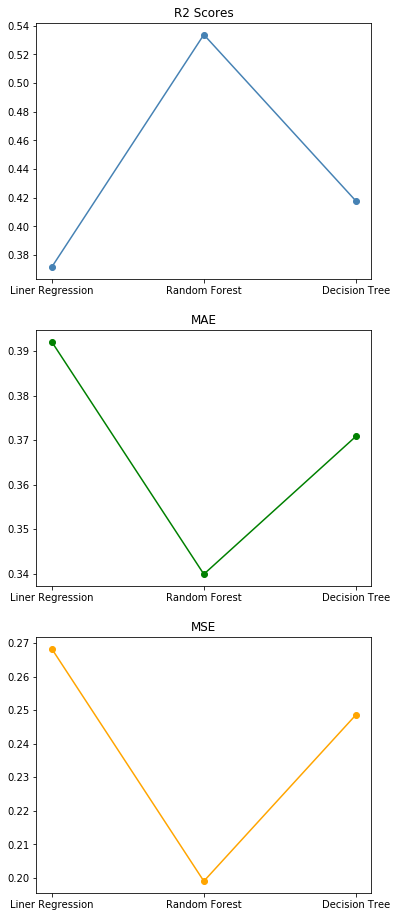

In [50]:
# compare r-squared, mae, mse scores of three ML algorithms
fig, (ax1, ax2, ax3) = plt.subplots(3, 1 ,figsize = (6, 16))
ax1.set_title("R2 Scores")
ax1.plot(list(r_squared_test_score_dict.keys()), list(r_squared_test_score_dict.values()), marker = "o", color = "steelblue")
ax2.set_title("MAE")
ax2.plot(list(mae_dict.keys()), list(mae_dict.values()), marker = "o", color = "green")
ax3.set_title("MSE")
ax3.plot(list(mse_dict.keys()), list(mse_dict.values()), marker = "o", color = "orange")

<a id='conclude'></a>
# Conclusion

By applying data to three ML Algorithms, which are Liner Regression, Random Forest Regression and Decision Tree Regression, we found that the Random Forest Regression has the best performance. Random Forest has the highest R-squared score and lowest MSE score. In terms of works in the future, there are two directions, firstly, we could consider finding the relationship between Aribnb Naming and its price. Secondly, instead of predicting a specific price, we could turn it into a classification problem, predicting a price bucket, which will show Airbnb home provider a lowest suggest price and a highest suggest price. By doing so, accuracy may very well increase and this model would be more useful from a practical standpoint.